# Snow extent box plots (as Mudryk paper) and errors calculations

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-06-26T07:12:50.638067+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_Snow_project/notebooks/codes_ORL_evaluation


In [ ]:
pip install cdo

In [4]:
from module import *

In [5]:
%watermark --iversions

skimage   : 0.25.0
cdo       : 1.6.1
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
cartopy   : 0.24.0
xarray    : 2025.1.1
numpy     : 2.0.2
pandas    : 2.2.3
netCDF4   : 1.7.2
seaborn   : 0.13.2
xesmf     : 0.8.8
watermark : 2.5.0
matplotlib: 3.10.0
csv       : 1.0



## Mes fichiers d'extension mensuelle moyenne de neige pour tous les modèles - Fichiers historiques

### Représentation graphique de l'extension mensuelle moyenne de neige

In [6]:
# méthode avec fichiers historiques
histo = pd.read_csv('~/private-storage/fichiers_csv/Comparaison entre modèles - avec_glaciers_historical(3).csv', sep=',')
histo

,model,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
0,BCC_CSM2_MR,44373746,44552932,41193897,33091211,21241930,9921410,5103984,4124142,5976217,16158221,28392274,39030064,24430002
1,CESM2,45216181,45051558,39354482,28760522,17296116,8956349,4508116,3205742,5010174,14828405,28077825,38942323,23267316
2,CESM2_WACCM,44828597,45262810,40140563,30244751,18585419,9614280,4681767,3305975,5391869,15439797,27729551,38848351,23672811
3,CIESM,47723947,46345451,40335309,29149809,16608088,5306690,1942933,1509077,2631250,13523167,30923558,42995489,23249564
4,CNRM_CM6_1,55821318,55785478,48562254,33406143,17368459,5657832,3136854,2885529,5029636,17365538,35534535,49134154,27473978
5,CNRM_CM6_1_HR,54244195,54118724,47914149,33321736,17056873,6009407,3486442,3384403,6117203,18748444,36136902,48753303,27440982
6,CNRM_ESM2_1,53699647,53406180,46546059,32661670,16403215,5168239,2816770,2508563,4445376,16225897,33316758,47198218,26199716
7,CanESM5,49815466,50758678,46597043,36731964,22770912,9093042,3651710,3057670,5027468,16604505,32498867,43620056,26685615
8,CanESM5_CanOE,49990349,50843552,47003030,37497242,23216673,9372790,3762654,3022692,5274633,16944311,33210031,44491640,27052466
9,EC_Earth3,59998244,58953864,54518525,45891709,33388277,19589662,7544347,7344999,17314070,35377448,49136634,57755720,37234458


In [7]:
# passage au format long
histo_long = histo.melt(id_vars='model', var_name='Month', value_name='snow_extent')
histo_long

,model,Month,snow_extent
0,BCC_CSM2_MR,jan,44373746
1,CESM2,jan,45216181
2,CESM2_WACCM,jan,44828597
3,CIESM,jan,47723947
4,CNRM_CM6_1,jan,55821318
...,...,...,...
333,MRI_ESM2_0,ann,25078150
334,NorESM2_LM,ann,24676466
335,NorESM2_MM,ann,24918593
336,UKESM1_0_LL,ann,28276896


In [8]:
# extraction des données de référence
ref_data = histo_long[histo_long['model'] == 'Reference']
ref_data

,model,Month,snow_extent
25,Reference,jan,47527339
51,Reference,feb,47170685
77,Reference,mar,41034269
103,Reference,apr,32014146
129,Reference,may,19553457
155,Reference,jun,9003870
181,Reference,jul,3134122
207,Reference,aug,2460193
233,Reference,sep,4226952
259,Reference,oct,17861365


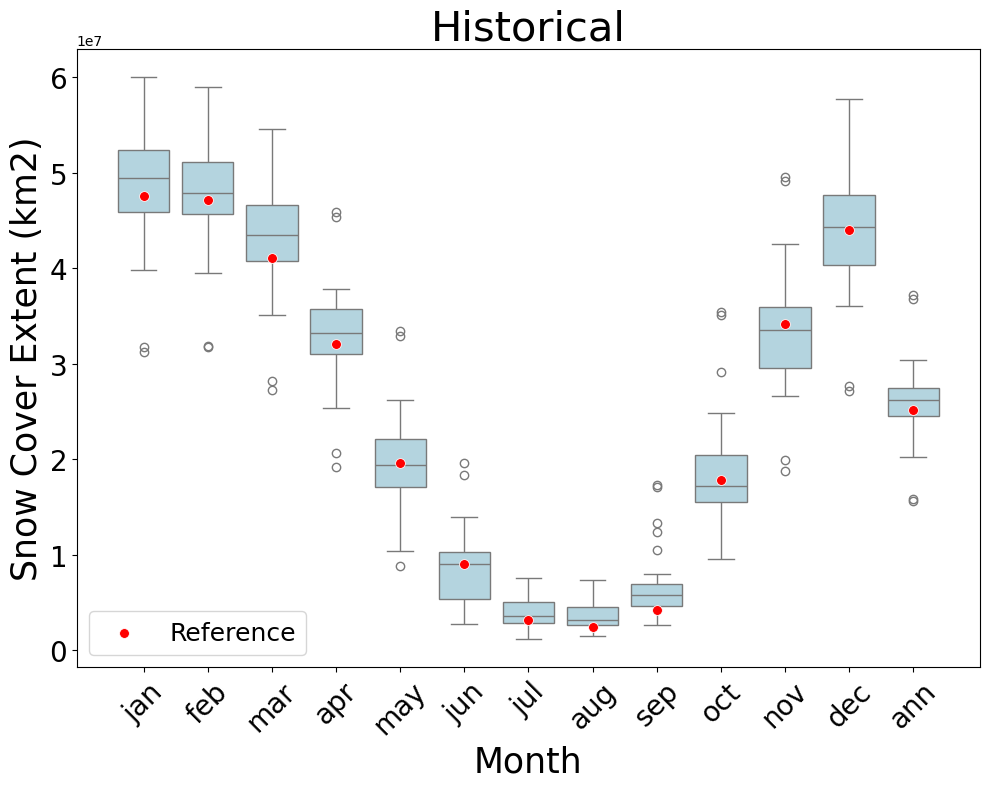

In [9]:
# tracé d'un boxplot de la couverture neigeuse mensuelle
plt.figure(figsize=(10, 8))
sns.boxplot(x='Month', y='snow_extent', data=histo_long, color='lightblue')
sns.scatterplot(x='Month', y='snow_extent', data=ref_data, color='red', s=50, label='Reference', zorder=10)
plt.title('Historical', fontsize='30')
plt.ylabel('Snow Cover Extent (km2)', fontsize='25')
plt.xlabel('Month', fontsize='25')
plt.xticks(rotation=45, fontsize='20')
plt.yticks(fontsize='20')
plt.legend(fontsize='18')
plt.tight_layout()
#plt.savefig("figures/boxplot_historical_snow_extent.png") #à utiliser si on veut enregistrer la figure
plt.show()

Sur cette figure on remarque que la référence (points rouges) se situe assez bien dans les intervalles créés par les modèles, ce qui montre une cohérence entre réalité et simulations. Néanmoins, on remarque également que de nombreux points se situent hors des intervalles créés par les boxplots, ces points sont les outliers de cette analyse.

### Détermination des outliers

In [10]:
# calcul des outliers présents sur la figure au-dessus
outliers = []

# detection des outliers pour chaque mois
for mois in histo_long['Month'].unique():
    valeurs = histo_long[histo_long['Month'] == mois]['snow_extent']
    q1 = valeurs.quantile(0.25)
    q3 = valeurs.quantile(0.75)
    iqr = q3 - q1 #(interquantile range)
    seuil_bas = q1 - 1.5 * iqr
    seuil_haut = q3 + 1.5 * iqr

    # selection des outliers
    outliers_mois = histo_long[
        (histo_long['Month'] == mois) &
        ((histo_long['snow_extent'] < seuil_bas) | (histo_long['snow_extent'] > seuil_haut))
    ]
    outliers.append(outliers_mois)

outliers_df = pd.concat(outliers)

In [11]:
outliers_df

,model,Month,snow_extent
19,MPI_ESM1_2_HR,jan,31700025
20,MPI_ESM1_2_LR,jan,31251024
45,MPI_ESM1_2_HR,feb,31744757
46,MPI_ESM1_2_LR,feb,31813660
71,MPI_ESM1_2_HR,mar,27200100
72,MPI_ESM1_2_LR,mar,28202785
87,EC_Earth3,apr,45891709
88,EC_Earth3_Veg,apr,45314979
97,MPI_ESM1_2_HR,apr,19126849
98,MPI_ESM1_2_LR,apr,20673690


Ce tableau indique quels sont les modèles situés hors de l'intervalle, en précisant pour quel mois et avec quelle valeur de couverture neigeuse.

### Calcul des erreurs absolues

In [14]:
# création d'un nouveau df
df_avec_erreur = histo_long.merge(ref_data, on='Month', how='left')
df_avec_erreur

,model_x,Month,snow_extent_x,model_y,snow_extent_y
0,BCC_CSM2_MR,jan,44373746,Reference,47527339
1,CESM2,jan,45216181,Reference,47527339
2,CESM2_WACCM,jan,44828597,Reference,47527339
3,CIESM,jan,47723947,Reference,47527339
4,CNRM_CM6_1,jan,55821318,Reference,47527339
...,...,...,...,...,...
333,MRI_ESM2_0,ann,25078150,Reference,25179286
334,NorESM2_LM,ann,24676466,Reference,25179286
335,NorESM2_MM,ann,24918593,Reference,25179286
336,UKESM1_0_LL,ann,28276896,Reference,25179286


In [15]:
# calcul de l'erreur absolue (neige simulée - neige de référence)
df_avec_erreur['Erreur_absolue'] = (df_avec_erreur['snow_extent_x'] - df_avec_erreur['snow_extent_y']).abs()

In [16]:
df_avec_erreur

,model_x,Month,snow_extent_x,model_y,snow_extent_y,Erreur_absolue
0,BCC_CSM2_MR,jan,44373746,Reference,47527339,3153593
1,CESM2,jan,45216181,Reference,47527339,2311158
2,CESM2_WACCM,jan,44828597,Reference,47527339,2698742
3,CIESM,jan,47723947,Reference,47527339,196608
4,CNRM_CM6_1,jan,55821318,Reference,47527339,8293979
...,...,...,...,...,...,...
333,MRI_ESM2_0,ann,25078150,Reference,25179286,101136
334,NorESM2_LM,ann,24676466,Reference,25179286,502820
335,NorESM2_MM,ann,24918593,Reference,25179286,260693
336,UKESM1_0_LL,ann,28276896,Reference,25179286,3097610


#### Visualisation sous forme de heat map

In [17]:
# je force l'ordre des mois, sinon classe par ordre alphabétique
ordre_mois = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 
              'sep', 'oct', 'nov', 'dec', 'ann']

# je réorganise mes données de format long à large
df_pivot_absolu = df_avec_erreur[df_avec_erreur['model_x'] !='Reference'].pivot(index='model_x', columns='Month', values='Erreur_absolue')
df_pivot_absolu = df_pivot_absolu[ordre_mois]

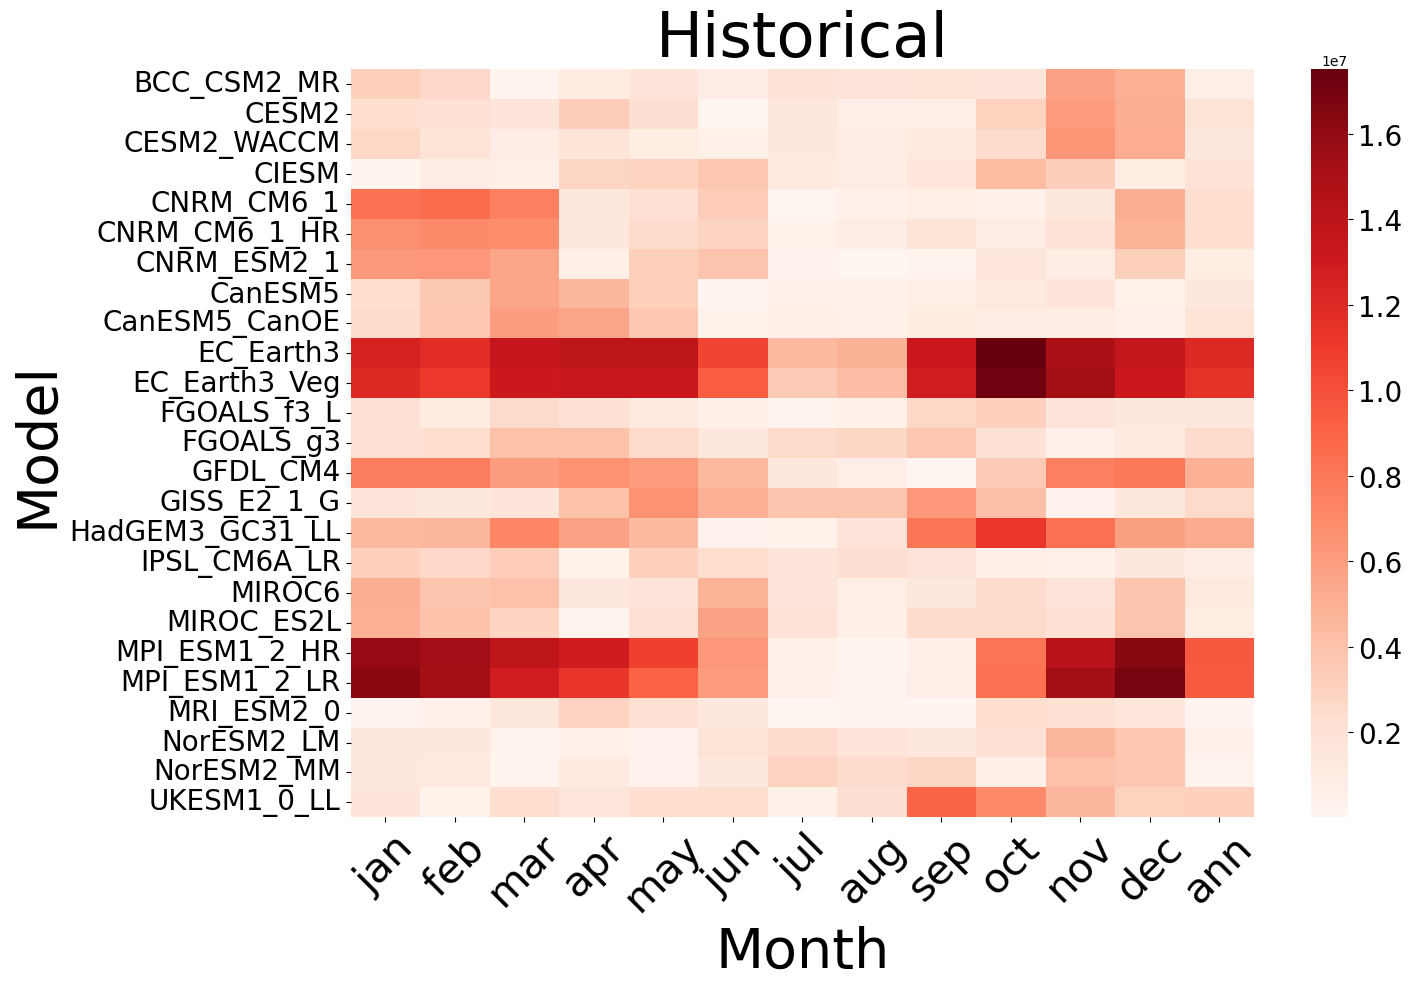

In [22]:
# Création des heatmap avec erreurs absolues
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_pivot_absolu, annot=False, cmap='Reds') #annot False comme ça les valeurs ne s'affichent pas dedans 
plt.title("Historical", fontsize='45')
plt.xlabel("Month", fontsize='40')
plt.ylabel("Model", fontsize='40')
plt.xticks(rotation=45, fontsize='30')
plt.yticks(fontsize='20')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig('figures/absolute_error_historical.png') # à utiliser si enregistrement figure
plt.show()

Cette figure présente les erreurs absolues de couverture neigeuse par rapport à la référence obtenues par le calcul. Cette visualisation permet d'avoir un aperçu rapide des modèles et des mois pour lesquels la neige est mal simulée (zones très rouges). Ici, on va que notamment 2 groupes de modèles la simulent mal (EC-Earth et MPI-ESM1-2). C'est utile de le savoir afin de les prendre moins en considération dans les analyses futures.

### Calcul des erreurs relatives

In [27]:
# Calcul des erreurs relatives (en %)
df_avec_erreur['Erreur_relative'] = (((df_avec_erreur['snow_extent_x'] - df_avec_erreur['snow_extent_y'])/df_avec_erreur['snow_extent_y'])*100).abs()

#### Visualisation sous forme de heatmap

In [28]:
# je réorganise mes données de format long à large
df_pivot_relative = df_avec_erreur[df_avec_erreur['model_x'] !='Reference'].pivot(index='model_x', columns='Month', values='Erreur_relative')
df_pivot_relative = df_pivot_relative[ordre_mois]

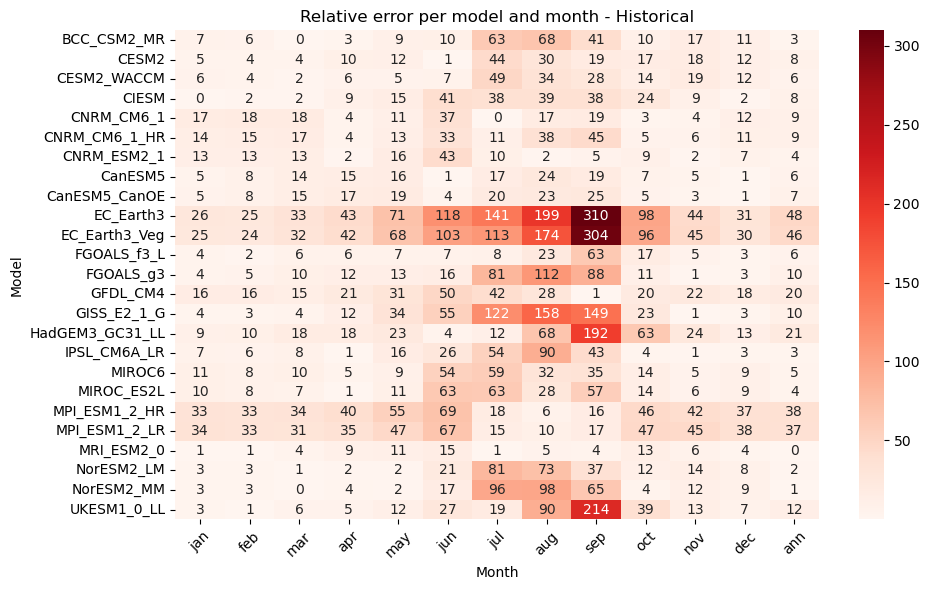

In [29]:
# Création heatmap erreurs relatives
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot_relative, annot=True, fmt=".0f", cmap='Reds') #annot Flase comme ça les valeurs ne s'affichent pas dedans 
plt.title("Relative error per model and month - Historical")
plt.xlabel("Month")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cette figure présente cette fois les erreurs relatives. On remarque qu'elles sont notamment importantes pendant l'été pour une grande majorité des modèles. Et de manière annuelle, ce sont les mêmes modèles que précédemment qui ont cette erreur la plus importante.

Ensuite, on reproduit exactement la même chose que précédemment mais avec des fichiers différents afin de voir si les résultats sont les mêmes.

## Fichiers d'extension mensuelle moyenne de neige pour tous les modèles - Fichiers SnowWarming (période de référence : 1850-1900)

### Représentation graphique

In [30]:
snow_warming = pd.read_csv('~/private-storage/fichiers_csv/Comparaison entre modèles - avec_glaciers_limit_0.85(1).csv', sep=',')
snow_warming

,model,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
0,BCC_CSM2_MR,42795905,43480729,40217932,30994260,19250432,9211745,4900688,3882692,5438778,15371854,28013595,37517225,23422986
1,CESM2,44441224,44303073,38760290,27843785,16688623,8468683,4131119,3058190,4607454,14574569,27561326,38470229,22742380
2,CESM2_WACCM,44372195,44545269,39385001,29729306,18333683,9406806,4593435,3267960,5355191,15187748,27914089,38774870,23405463
3,CIESM,48454603,46709349,40306284,29249629,16327379,5349691,1957616,1540496,2918359,14376906,32204191,43625004,23584959
4,CNRM_CM6_1,55385815,55292975,48114923,32765848,16906707,5609524,3122609,2854806,4981037,17203586,35258584,48764683,27188425
5,CNRM_CM6_1_HR,54455404,54284557,48001281,33396804,17200663,6172689,3583150,3509893,6503774,19552980,36890031,49348237,27741622
6,CNRM_ESM2_1,53031816,52996222,45995935,31714825,15362010,4934792,2715880,2415117,4199707,15212909,32480653,46552703,25634381
7,CanESM5,50172193,51346405,46545365,37268103,23466690,9476357,3957560,3443644,5803028,17581001,33768690,44546722,27281313
8,CanESM5_CanOE,50697638,51791544,47864355,37994282,24090660,10811023,4381156,3681365,6415265,19270572,34460611,45089588,28045672
9,EC_Earth3,59623000,58709797,54081147,45197276,32230315,18799812,6865128,7016896,16929935,34622492,48597593,57499124,36681043


In [31]:
# passage au format long
snow_warming_long = snow_warming.melt(id_vars='model', var_name='Month', value_name='snow_extent')
snow_warming_long

,model,Month,snow_extent
0,BCC_CSM2_MR,jan,42795905
1,CESM2,jan,44441224
2,CESM2_WACCM,jan,44372195
3,CIESM,jan,48454603
4,CNRM_CM6_1,jan,55385815
...,...,...,...
333,MRI_ESM2_0,ann,24280893
334,NorESM2_LM,ann,23639902
335,NorESM2_MM,ann,23952070
336,UKESM1_0_LL,ann,27524830


In [32]:
# extraction de la référence du fichier long
ref_data_SW = snow_warming_long[snow_warming_long['model'] == 'Reference']
ref_data_SW

,model,Month,snow_extent
25,Reference,jan,47527339
51,Reference,feb,47170685
77,Reference,mar,41034269
103,Reference,apr,32014146
129,Reference,may,19553457
155,Reference,jun,9003870
181,Reference,jul,3134122
207,Reference,aug,2460193
233,Reference,sep,4226952
259,Reference,oct,17861365


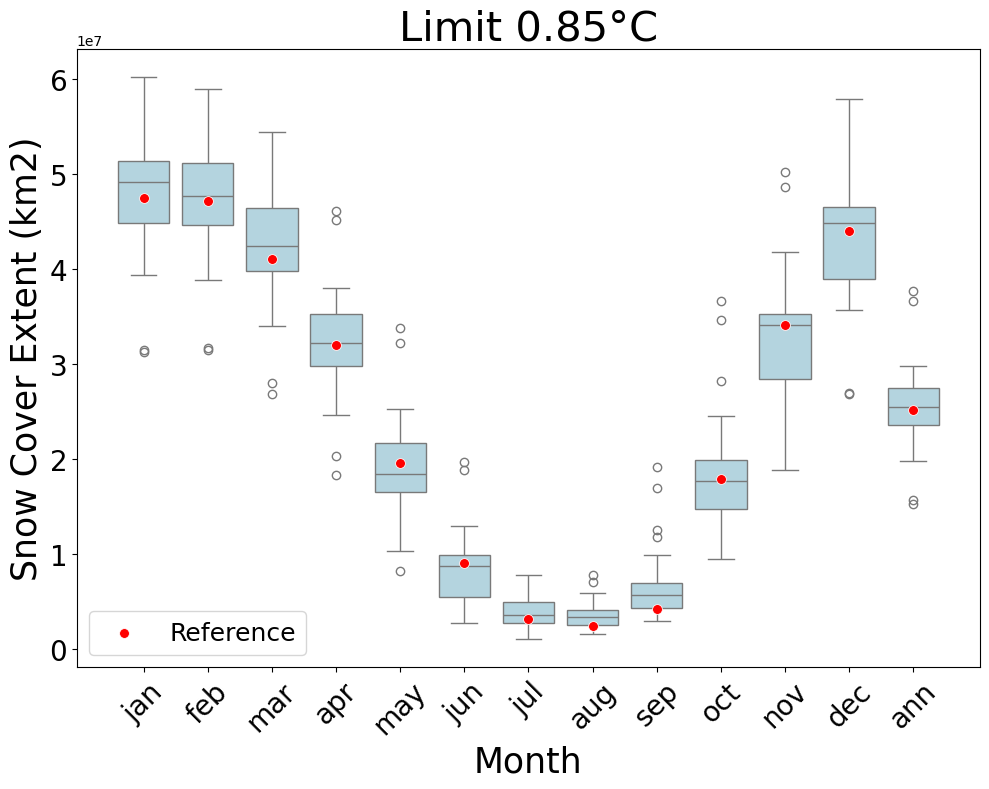

In [33]:
# création d'un boxplot des valeurs de couverture neigeuse mensuelles moyennes
plt.figure(figsize=(10, 8))
sns.boxplot(x='Month', y='snow_extent', data=snow_warming_long, color='lightblue')
sns.scatterplot(x='Month', y='snow_extent', data=ref_data_SW, color='red', s=50, label='Reference', zorder=10) # je mets en évidence les données de référence
plt.title('Limit 0.85°C', fontsize='30')
plt.ylabel('Snow Cover Extent (km2)', fontsize='25')
plt.xlabel('Month', fontsize='25')
plt.xticks(rotation=45, fontsize='20')
plt.yticks(fontsize='20')
plt.legend(fontsize='18')
plt.tight_layout()
#plt.savefig("figures/boxplot_085_snow_extent.png")
plt.show()

In [34]:
outliers_SW = []

# detection des outliers pour chaque mois
for mois in snow_warming_long['Month'].unique():
    valeurs = snow_warming_long[snow_warming_long['Month'] == mois]['snow_extent']
    q1 = valeurs.quantile(0.25)
    q3 = valeurs.quantile(0.75)
    iqr = q3 - q1 #(interquantile range)
    seuil_bas = q1 - 1.5 * iqr
    seuil_haut = q3 + 1.5 * iqr

    # selection des outliers
    outliers_mois = snow_warming_long[
        (snow_warming_long['Month'] == mois) &
        ((snow_warming_long['snow_extent'] < seuil_bas) | (snow_warming_long['snow_extent'] > seuil_haut))
    ]
    outliers_SW.append(outliers_mois)

outliers_SW = pd.concat(outliers_SW)

In [35]:
outliers_SW

,model,Month,snow_extent
19,MPI_ESM1_2_HR,jan,31454066
20,MPI_ESM1_2_LR,jan,31246344
45,MPI_ESM1_2_HR,feb,31465685
46,MPI_ESM1_2_LR,feb,31695454
71,MPI_ESM1_2_HR,mar,26841750
72,MPI_ESM1_2_LR,mar,27966861
87,EC_Earth3,apr,45197276
88,EC_Earth3_Veg,apr,46083072
97,MPI_ESM1_2_HR,apr,18261679
98,MPI_ESM1_2_LR,apr,20357511


### Calcul des erreurs absolues

In [36]:
snow_warming_avec_erreur = snow_warming_long.merge(ref_data_SW, on='Month', how='left')
snow_warming_avec_erreur

,model_x,Month,snow_extent_x,model_y,snow_extent_y
0,BCC_CSM2_MR,jan,42795905,Reference,47527339
1,CESM2,jan,44441224,Reference,47527339
2,CESM2_WACCM,jan,44372195,Reference,47527339
3,CIESM,jan,48454603,Reference,47527339
4,CNRM_CM6_1,jan,55385815,Reference,47527339
...,...,...,...,...,...
333,MRI_ESM2_0,ann,24280893,Reference,25179286
334,NorESM2_LM,ann,23639902,Reference,25179286
335,NorESM2_MM,ann,23952070,Reference,25179286
336,UKESM1_0_LL,ann,27524830,Reference,25179286


In [37]:
snow_warming_avec_erreur['Erreur_absolue'] = (snow_warming_avec_erreur['snow_extent_x'] - snow_warming_avec_erreur['snow_extent_y']).abs()

#### Visualisation sous forme de heatmap

In [38]:
ordre_mois_SW = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'ann']

# je réorganise mes données de format long à large
snow_warming_pivot_absolu = snow_warming_avec_erreur[snow_warming_avec_erreur['model_x'] !='Reference'].pivot(index='model_x', columns='Month', values='Erreur_absolue')
snow_warming_pivot_absolu = snow_warming_pivot_absolu[ordre_mois_SW]

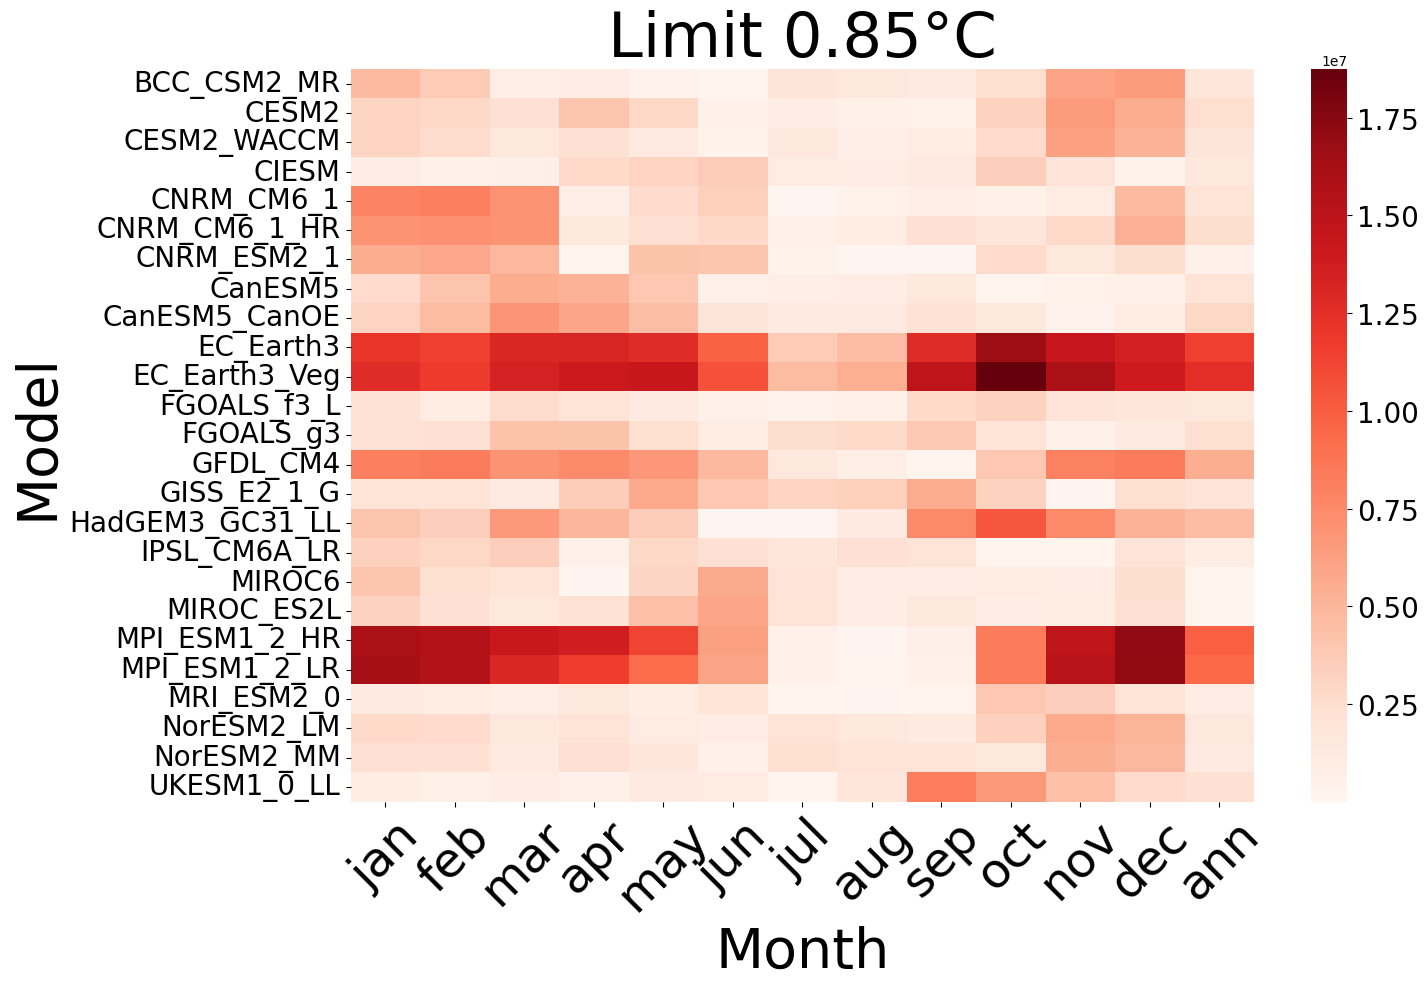

In [39]:
plt.figure(figsize=(15, 10))
ax=sns.heatmap(snow_warming_pivot_absolu, annot=False, cmap='Reds') #annot Flase comme ça les valeurs ne s'affichent pas dedans 
plt.title("Limit 0.85°C", fontsize='45')
plt.xlabel("Month", fontsize='40')
plt.ylabel("Model", fontsize='40')
plt.xticks(rotation=45, fontsize='35')
plt.yticks(fontsize='20')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig("figures/absolute_error_limit085.png")
plt.show()

On remarque ici que ce sont les mêmes modèles que précédemment qui possèdent les plus fortes erreurs, ce qui confirme la fiabilité de l'analyse.

### Calcul des erreurs relatives

In [40]:
# Calcul des erreurs relatives
snow_warming_avec_erreur['Erreur_relative'] = (((snow_warming_avec_erreur['snow_extent_x'] - snow_warming_avec_erreur['snow_extent_y'])/snow_warming_avec_erreur['snow_extent_y'])*100).abs()

#### Visualisation sous forme de heatmap

In [41]:
# je réorganise mes données de format long à large
snow_warming_pivot_relative = snow_warming_avec_erreur[snow_warming_avec_erreur['model_x'] !='Reference'].pivot(index='model_x', columns='Month', values='Erreur_relative')
snow_warming_pivot_relative = snow_warming_pivot_relative[ordre_mois_SW]

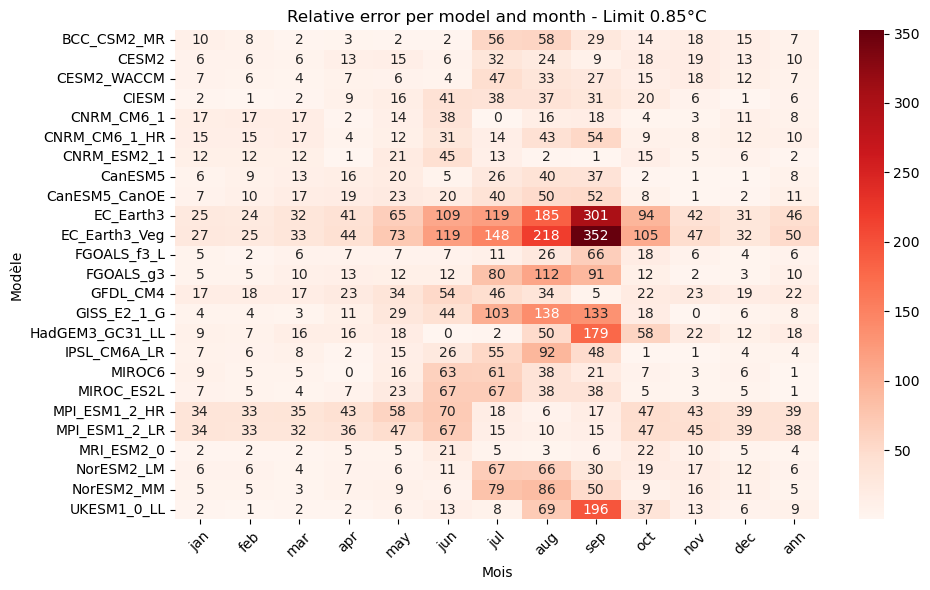

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(snow_warming_pivot_relative, annot=True, fmt=".0f", cmap='Reds') #annot true pour avoir %age affiché
plt.title("Relative error per model and month - Limit 0.85°C")
plt.xlabel("Mois")
plt.ylabel("Modèle")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mes fichiers d'extension mensuelle moyenne de neige pour tous les modèles - Fichiers SnowWarming (période de référence : 1995-2014)

In [43]:
snow_warming_1995_2014 = pd.read_csv('~/private-storage/fichiers_csv/Comparaison entre modèles - avec_glaciers_limit_0.csv', sep=',')
snow_warming_1995_2014

,modele,janvier,fevrier,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,decembre,annuel
0,BCC_CSM2_MR,44112232,44346595,41243458,32706015,20724486,9314200,4782574,3852254,5483265,15777138,27883375,38404202,24052483
1,CESM2,44718744,44817016,38660443,28208171,17084184,8767758,4233540,3052076,4714744,14408998,27941509,38882333,22957460
2,CESM2_WACCM,44201826,44025700,38917304,29239059,18060286,9337647,4684111,3237968,5258529,15213311,27589844,39023748,23232444
3,CIESM,47585030,46028402,40238384,29628768,18064785,6113189,1975199,1502748,2544534,13649226,30776581,42737645,23403708
4,CNRM_CM6_1,55439296,54999759,47818981,32525422,16880090,5709647,3130356,2867773,4990358,17178742,35594297,49004932,27178304
5,CNRM_CM6_1_HR,54318741,53543118,46912283,32922625,16567491,5820886,3441228,3377646,6115550,18629582,35633296,48561452,27153658
6,CNRM_ESM2_1,52903436,53214506,46279520,32542746,15664495,5038690,2767656,2482241,4278576,15784610,33133533,46230945,25860080
7,CanESM5,49894508,50870619,46870717,36293500,21234119,8282672,3382804,2854810,4791725,16193656,32823076,43672326,26430378
8,CanESM5_CanOE,49588068,50752060,46030758,36904687,22331091,8236840,3339876,2769129,5206191,16855031,32876823,44348940,26603291
9,EC_Earth3,59580525,58644371,54149939,45142054,32170198,18812168,6650636,6900227,17280376,34920845,47812441,57105598,36597448


In [44]:
# passage au format long
snow_warming_1995_2014_long = snow_warming_1995_2014.melt(id_vars='modele', var_name='Mois', value_name='snow_extent')

In [45]:
# extraction de la référence du fichier long
ref_data_SW_1995_2014 = snow_warming_1995_2014_long[snow_warming_1995_2014_long['modele'] == 'Reference']
ref_data_SW_1995_2014

,modele,Mois,snow_extent
25,Reference,janvier,47527339
51,Reference,fevrier,47170685
77,Reference,mars,41034269
103,Reference,avril,32014146
129,Reference,mai,19553457
155,Reference,juin,9003870
181,Reference,juillet,3134122
207,Reference,aout,2460193
233,Reference,septembre,4226952
259,Reference,octobre,17861365


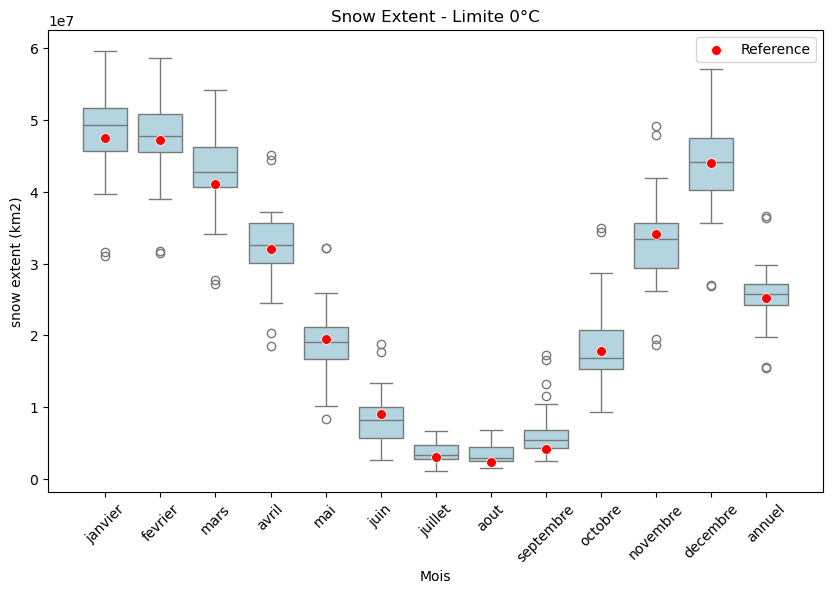

In [46]:
# création d'un boxplot des valeurs de couverture neigeuse mensuelles moyennes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mois', y='snow_extent', data=snow_warming_1995_2014_long, color='lightblue')
sns.scatterplot(x='Mois', y='snow_extent', data=ref_data_SW_1995_2014, color='red', s=50, label='Reference', zorder=10) # je mets en évidence les données de référence
plt.title('Snow Extent - Limite 0°C')
plt.ylabel('snow extent (km2)')
plt.xticks(rotation=45)
plt.show()

In [47]:
outliers_SW_1995_2014 = []

# detection des outliers pour chaque mois
for mois in snow_warming_1995_2014_long['Mois'].unique():
    valeurs = snow_warming_1995_2014_long[snow_warming_1995_2014_long['Mois'] == mois]['snow_extent']
    q1 = valeurs.quantile(0.25)
    q3 = valeurs.quantile(0.75)
    iqr = q3 - q1 #(interquantile range)
    seuil_bas = q1 - 1.5 * iqr
    seuil_haut = q3 + 1.5 * iqr

    # selection des outliers
    outliers_mois = snow_warming_1995_2014_long[
        (snow_warming_1995_2014_long['Mois'] == mois) &
        ((snow_warming_1995_2014_long['snow_extent'] < seuil_bas) | (snow_warming_1995_2014_long['snow_extent'] > seuil_haut))
    ]
    outliers_SW_1995_2014.append(outliers_mois)

outliers_SW_1995_2014 = pd.concat(outliers_SW_1995_2014)

In [48]:
outliers_SW_1995_2014

,modele,Mois,snow_extent
19,MPI_ESM1_2_HR,janvier,31631201
20,MPI_ESM1_2_LR,janvier,31075543
45,MPI_ESM1_2_HR,fevrier,31792726
46,MPI_ESM1_2_LR,fevrier,31495605
71,MPI_ESM1_2_HR,mars,27163983
72,MPI_ESM1_2_LR,mars,27738924
87,EC_Earth3,avril,45142054
88,EC_Earth3_Veg,avril,44443213
97,MPI_ESM1_2_HR,avril,18543629
98,MPI_ESM1_2_LR,avril,20362535


## Calcul des erreurs absolues

In [49]:
snow_warming_avec_erreur_1995_2014 = snow_warming_1995_2014_long.merge(ref_data_SW_1995_2014, on='Mois', how='left')

In [50]:
snow_warming_avec_erreur_1995_2014['Erreur_absolue'] = (snow_warming_avec_erreur_1995_2014['snow_extent_x'] - snow_warming_avec_erreur_1995_2014['snow_extent_y']).abs()

### Visualisation sous forme de heatmap

In [51]:
ordre_mois_SW = ['janvier', 'fevrier', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'septembre', 'octobre', 'novembre', 'decembre', 'annuel']

# je réorganise mes données de format long à large
snow_warming_pivot_absolu_1995_2014 = snow_warming_avec_erreur_1995_2014[snow_warming_avec_erreur_1995_2014['modele_x'] !='Reference'].pivot(index='modele_x', columns='Mois', values='Erreur_absolue')
snow_warming_pivot_absolu_1995_2014 = snow_warming_pivot_absolu_1995_2014[ordre_mois_SW]

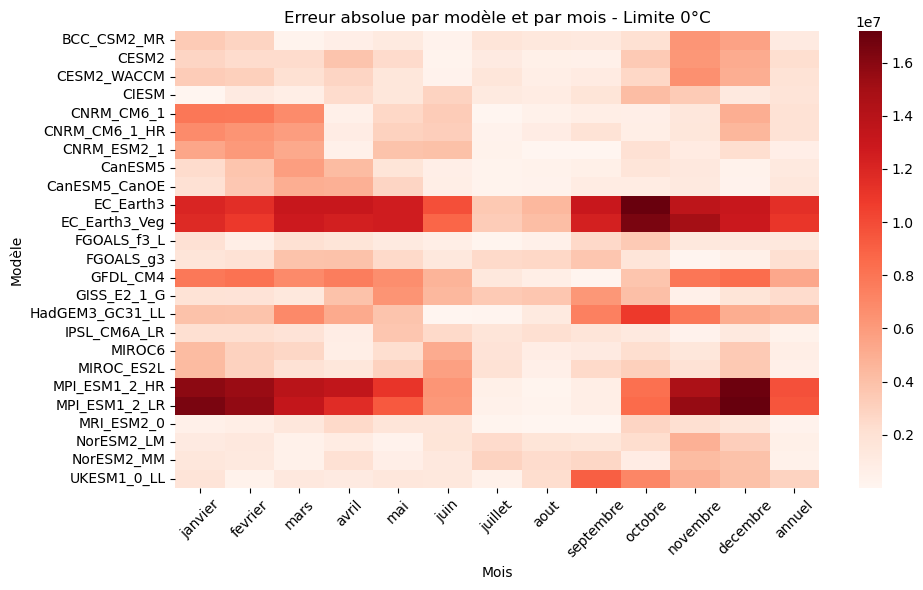

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(snow_warming_pivot_absolu_1995_2014, annot=False, cmap='Reds') #annot Flase comme ça les valeurs ne s'affichent pas dedans 
plt.title("Erreur absolue par modèle et par mois - Limite 0°C")
plt.xlabel("Mois")
plt.ylabel("Modèle")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Calcul des erreurs relatives

In [53]:
snow_warming_avec_erreur_1995_2014['Erreur_relative'] = (((snow_warming_avec_erreur_1995_2014['snow_extent_x'] - snow_warming_avec_erreur_1995_2014['snow_extent_y'])/snow_warming_avec_erreur_1995_2014['snow_extent_y'])*100).abs()

### Visualisation sous forme de heatmap

In [54]:
# je réorganise mes données de format long à large
snow_warming_pivot_relative_1995_2014 = snow_warming_avec_erreur_1995_2014[snow_warming_avec_erreur_1995_2014['modele_x'] !='Reference'].pivot(index='modele_x', columns='Mois', values='Erreur_relative')
snow_warming_pivot_relative_1995_2014 = snow_warming_pivot_relative_1995_2014[ordre_mois_SW]

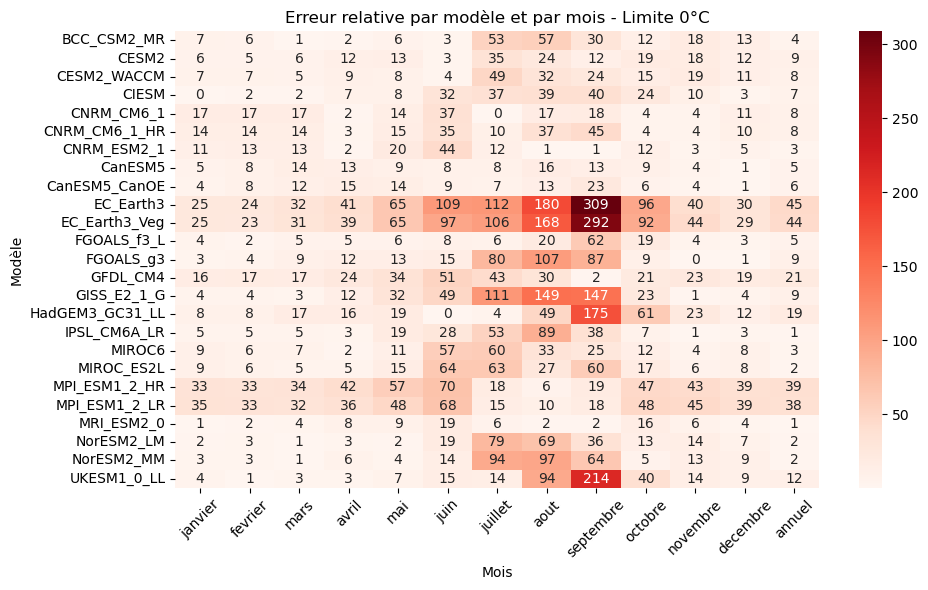

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(snow_warming_pivot_relative_1995_2014, annot=True, fmt=".0f", cmap='Reds') #annot true pour avoir %age affiché
plt.title("Erreur relative par modèle et par mois - Limite 0°C")
plt.xlabel("Mois")
plt.ylabel("Modèle")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Détermination du classement de chaque modèle

### A partir des fichiers historiques

In [56]:
erreurs_absolues_mensuelles_hist = df_pivot_absolu.drop(columns=['ann'])
erreurs_absolues_mensuelles_hist

Month,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
model_x,,,,,,,,,,,,
BCC_CSM2_MR,3153593,2617753,159628,1077065,1688473,917540,1969862,1663949,1749265,1703144,5759964,4982732
CESM2,2311158,2119127,1679787,3253624,2257341,47521,1373994,745549,783222,3032960,6074413,5070473
CESM2_WACCM,2698742,1907875,893706,1769395,968038,610410,1547645,845782,1164917,2421568,6422687,5164445
CIESM,196608,825234,698960,2864337,2945369,3697180,1191189,951116,1595702,4338198,3228680,1017307
CNRM_CM6_1,8293979,8614793,7527985,1391997,2184998,3346038,2732,425336,802684,495827,1382297,5121358
CNRM_CM6_1_HR,6716856,6948039,6879880,1307590,2496584,2994463,352320,924210,1890251,887079,1984664,4740507
CNRM_ESM2_1,6172308,6235495,5511790,647524,3150242,3835631,317352,48370,218424,1635468,835480,3185422
CanESM5,2288127,3587993,5562774,4717818,3217455,89172,517588,597477,800516,1256860,1653371,392740
CanESM5_CanOE,2463010,3672867,5968761,5483096,3663216,368920,628532,562499,1047681,917054,942207,478844


In [61]:
classement_modeles = erreurs_absolues_mensuelles_hist.mean(axis=1)

In [62]:
classement_modeles.sort_values(ascending=True, inplace=True)
print(classement_modeles)

model_x
MRI_ESM2_0         1.266978e+06
FGOALS_f3_L        1.609116e+06
NorESM2_LM         1.851120e+06
NorESM2_MM         1.869009e+06
IPSL_CM6A_LR       1.927405e+06
CIESM              1.962490e+06
CanESM5            2.056824e+06
CanESM5_CanOE      2.183057e+06
CESM2_WACCM        2.201268e+06
BCC_CSM2_MR        2.286914e+06
CESM2              2.395764e+06
FGOALS_g3          2.430790e+06
CNRM_ESM2_1        2.649459e+06
MIROC6             2.782514e+06
MIROC_ES2L         2.791986e+06
UKESM1_0_LL        3.097610e+06
CNRM_CM6_1_HR      3.176870e+06
CNRM_CM6_1         3.299169e+06
GISS_E2_1_G        3.367435e+06
GFDL_CM4           4.964078e+06
HadGEM3_GC31_LL    5.206403e+06
MPI_ESM1_2_LR      9.418989e+06
MPI_ESM1_2_HR      9.600430e+06
EC_Earth3_Veg      1.154588e+07
EC_Earth3          1.205517e+07
dtype: float64


Ici, les modèles sont classés selon leur valeur d'erreur absolue, de manière décroissante. Le premier modèle correspond au modèle avec la plus faible erreur et inversement.

## Attribution d'un score à chaque modèle

A partir des erreurs absolues moyennes, on peut attribuer un classement à chaque modèle. Deux fonctions de score différentes ont été testées : la fonction exponentielle et une fonction de type Gaussienne.

### Exponentielle décroissante

In [63]:
min_val = classement_modeles.min()
max_val = classement_modeles.max()

In [64]:
scores_exp = np.exp(-(classement_modeles - min_val)/(max_val - min_val))
scores_exp

model_x
MRI_ESM2_0         1.000000
FGOALS_f3_L        0.968784
NorESM2_LM         0.947293
NorESM2_MM         0.945724
IPSL_CM6A_LR       0.940619
CIESM              0.937564
CanESM5            0.929402
CanESM5_CanOE      0.918590
CESM2_WACCM        0.917041
BCC_CSM2_MR        0.909790
CESM2              0.900656
FGOALS_g3          0.897737
CNRM_ESM2_1        0.879724
MIROC6             0.868940
MIROC_ES2L         0.868178
UKESM1_0_LL        0.843928
CNRM_CM6_1_HR      0.837750
CNRM_CM6_1         0.828307
GISS_E2_1_G        0.823082
GFDL_CM4           0.709852
HadGEM3_GC31_LL    0.694085
MPI_ESM1_2_LR      0.469709
MPI_ESM1_2_HR      0.461875
EC_Earth3_Veg      0.385663
EC_Earth3          0.367879
dtype: float64

### Gaussienne "arrangée"

In [65]:
mu = classement_modeles.min()
sigma = (classement_modeles.max() - classement_modeles.min())/4

In [66]:
scores_gauss = np.exp(-((classement_modeles - mu) ** 2)/(2 * sigma **2))

In [67]:
scores_gauss

model_x
MRI_ESM2_0         1.000000
FGOALS_f3_L        0.991986
NorESM2_LM         0.976818
NorESM2_MM         0.975395
IPSL_CM6A_LR       0.970464
CIESM              0.967296
CanESM5            0.958024
CanESM5_CanOE      0.943948
CESM2_WACCM        0.941764
BCC_CSM2_MR        0.930991
CESM2              0.916144
FGOALS_g3          0.911101
CNRM_ESM2_1        0.876889
MIROC6             0.853953
MIROC_ES2L         0.852264
UKESM1_0_LL        0.794253
CNRM_CM6_1_HR      0.778231
CNRM_CM6_1         0.752864
GISS_E2_1_G        0.738404
GFDL_CM4           0.390808
HadGEM3_GC31_LL    0.344129
MPI_ESM1_2_LR      0.010379
MPI_ESM1_2_HR      0.008450
EC_Earth3_Veg      0.000701
EC_Earth3          0.000335
dtype: float64

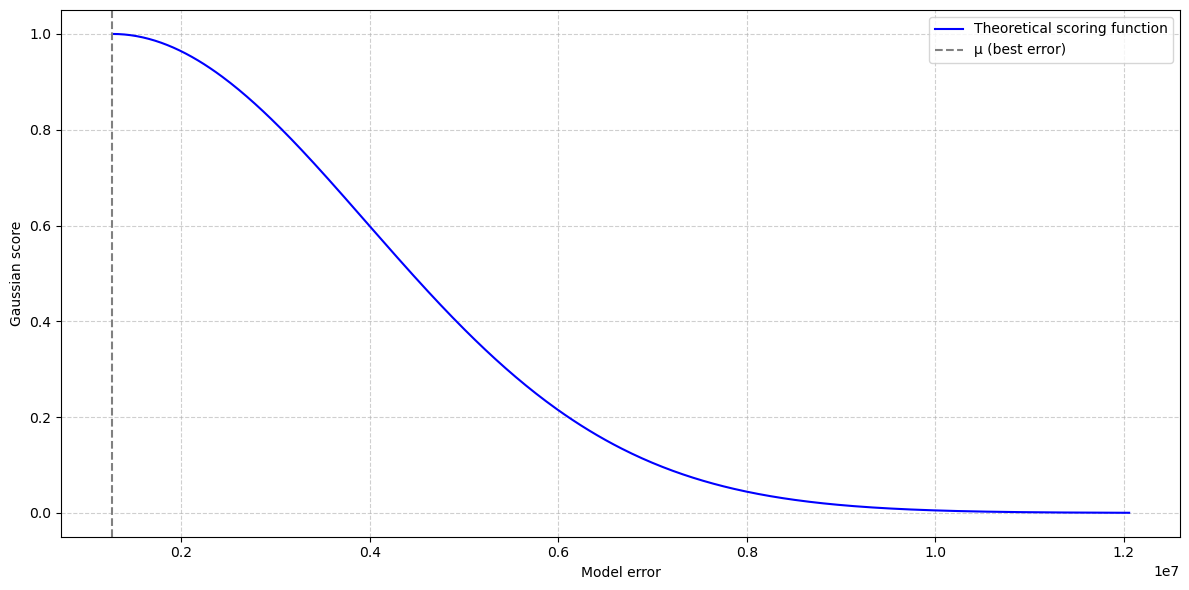

In [68]:
# Générer la courbe théorique
x = np.linspace(classement_modeles.min(), classement_modeles.max(), 500)
gauss_curve = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Tracé
plt.figure(figsize=(12, 6))
plt.plot(x, gauss_curve, label='Theoretical scoring function', color='blue')
plt.axvline(mu, color='gray', linestyle='--', label='μ (best error)')
plt.xlabel("Model error")
plt.ylabel("Gaussian score")
#plt.title("Transformation Gaussienne des Erreurs des Modèles")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
#plt.savefig("courbe_gaussienne.png")
plt.show()

### Création d'un dataframe

In [70]:
# création dataframe
scores_modeles = pd.DataFrame({
    'Erreur_moyenne' : classement_modeles,
    'Scores_exp' : scores_exp,
    'Scores_gauss' : scores_gauss,
})

In [71]:
scores_modeles

,Erreur_moyenne,Scores_exp,Scores_gauss
model_x,,,
MRI_ESM2_0,1.266978e+06,1.000000,1.000000
FGOALS_f3_L,1.609116e+06,0.968784,0.991986
NorESM2_LM,1.851120e+06,0.947293,0.976818
NorESM2_MM,1.869009e+06,0.945724,0.975395
IPSL_CM6A_LR,1.927405e+06,0.940619,0.970464
CIESM,1.962490e+06,0.937564,0.967296
CanESM5,2.056824e+06,0.929402,0.958024
CanESM5_CanOE,2.183057e+06,0.918590,0.943948
CESM2_WACCM,2.201268e+06,0.917041,0.941764


In [72]:
#scores_modeles.to_csv("~/private-storage/fichiers_csv/scores_modeles.csv")